<a href="https://colab.research.google.com/github/aabbinan/Intro_to_Machine_Learning/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Aidan Abbinante 801114895 Assignment 1

#In this homework, we will use a dataset provided: D3.csv Download D3.csv

#Let the first three columns of the data set be separate explanatory variables X1, X2, X3.
#Let the fourth column be the dependent variable Y.
# (Note: You cannot use the built-in function from ML libraries for gradient descent, you have to implement it yourself.)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Problem 1 (50 points)

#Develop a code that runs linear regression with a gradient decent algorithm for each
                                                # explanatory variable in isolation
df =pd.read_csv('D3.csv')
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


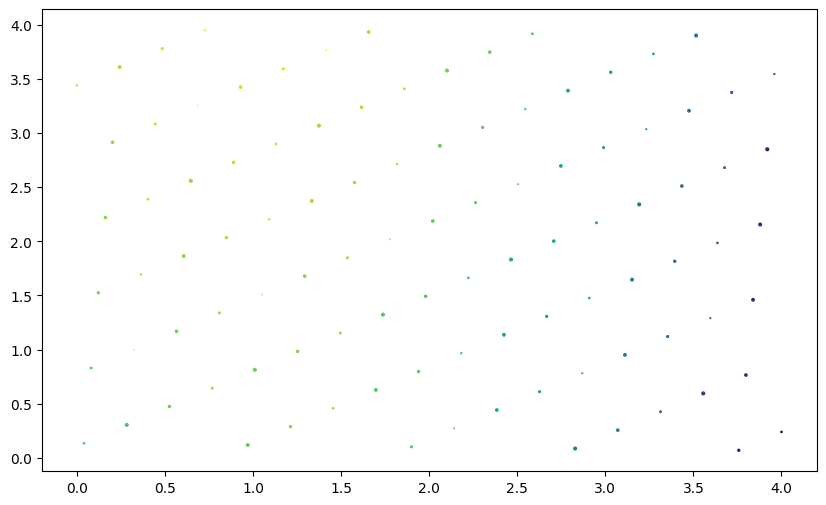

In [ ]:
plt.scatter(df.X1,df.X2,df.X3,df.Y)
plt.show()

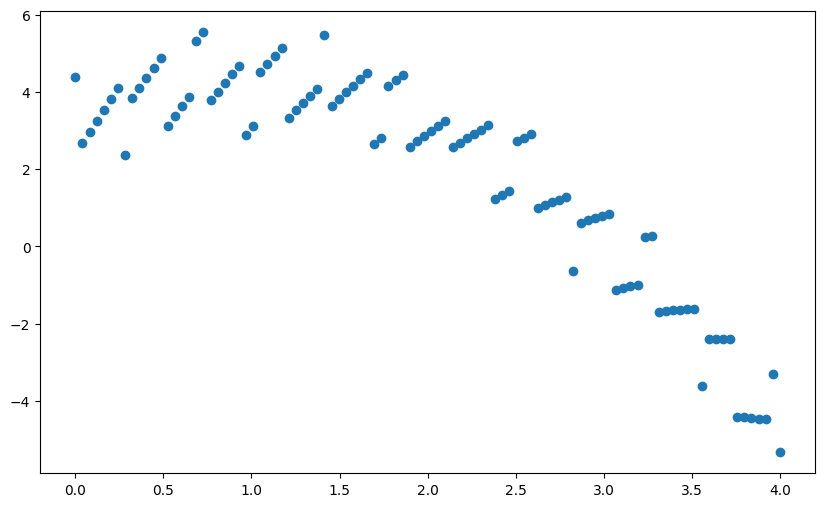

In [ ]:
plt.scatter(df.X1,df.Y)
plt.show()

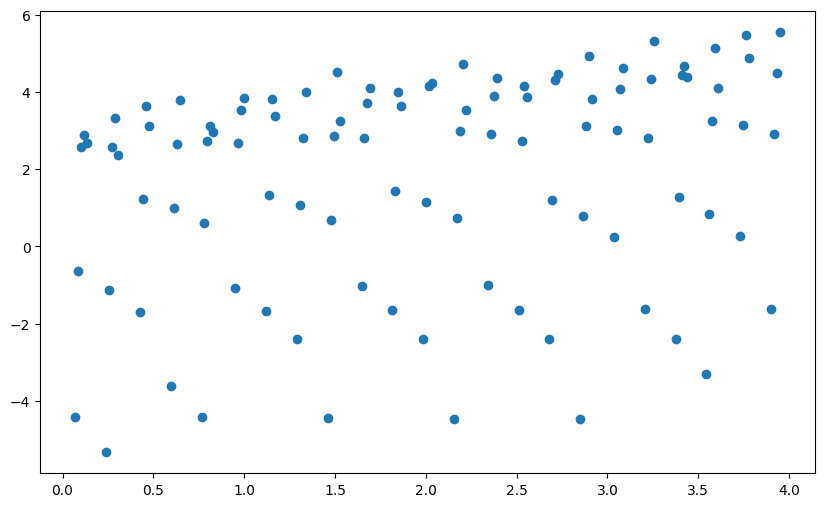

In [ ]:
plt.scatter(df.X2,df.Y)
plt.show()

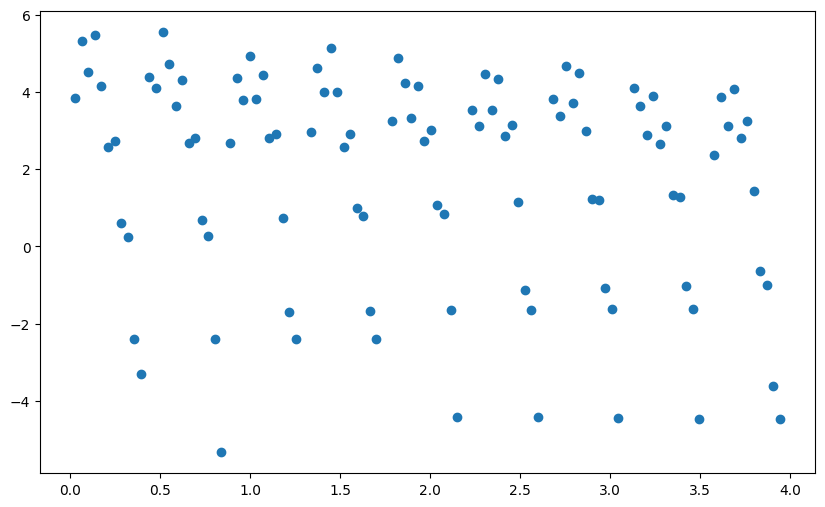

In [ ]:
plt.scatter(df.X3,df.Y)
plt.show()

In [ ]:
def costFunction(x,y,theta):
  """
  This function finds the cost for the linear regression model
  Inputs:
  x which is a matrix of X_0 and X_1 or X_2 or X_3, I think this changes around for different iterations

  y is the 1D array of labels/target value for each traing example. dimension(1 x m), this is df.Y

  theta is an 1D array of fitting parameters or weights. Dimension (1 x n), I think these update as the model improves

  Calculation params:
  m is the number of training examples, I think this means number of unique X_n' values or rows in x, date to
  use in training
  n is the number of features (including X_0 column of ones), this is the width or number of columns in the matrix

  Output Params
  J is a Scalar value, this should be J(theta_0,theta_1)
  """
  m = len(x)
  lamb = .7
  predictions = x.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J


In [ ]:
def gradientDescent(x, y, theta, alpha, iterations):
  """
  Calculate the gradient decent which is the old theta_j minus the learning rate times
  the derivative of the cost function

  Input Param
  x which is a matrix of X_0 and X_1 or X_2 or X_3, I think this changes around for different iterations

  y is the 1D array of labels/target value for each traing example. dimension(1 x m), this is df.Y

  theta is an 1D array of fitting parameters or weights. Dimension (1 x n), I think these update as the model improves

  alpha is the Learning rate. Scalar value, is what it sounds like
  iterations is the No of iterations. Scalar value, the number of loops the system makes

  Calculation params
  m is the number of training examples, I think this means number of unique X_n' values or rows in x, date to
  use in training
  n is the number of features (including X_0 column of ones), this is the width or number of columns in the matrix

  Output Parameters
  -----------------
  theta is the Final Value. 1D array of fitting parameters or weights. Dimension (1 x n), same as in, but updated
  cost_history Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * x.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = costFunction(x, y, theta)
  return theta, cost_history


In [ ]:
# In this case, you assume that in each iteration, only one explanatory variable (either X1, X2, or X3) is explaining the output.
# You need to do three different training, one per each explanatory variable.

#Lets create a matrix with a dimension of m by 1. m is the number of observations
if df.X1.size == df.X2.size == df.X3.size:
  m = df.X1.size
  X_0 = np.ones((m, 1))
  X_0 = pd.DataFrame(X_0)
  if df.size == 500:
    print('<(0_0<)')
  else:
    df.insert(0, "intercept",X_0)
  #display(df)

In [ ]:
#training 1 / #training 2 / training 3

# For the learning rate, explore different values between 0.1 and 0.01 (your choice).
# Initialize your parameters to zero (theta to zero).

# initialization params
theta = np.zeros(2)
iterations = 1500;
alpha = .05;
y = df.Y
yarray = y.values
xbin = []
xarraybin = []
thetabin = []
cost_hstry = []

for i in range(1,4):
  x = df.loc[:,['intercept','X%d'%(i)]]
  xarray = x.loc[:,['intercept','X%d'%(i)]].values
  theta, cost_history = gradientDescent(xarray, yarray, theta, alpha, iterations)
  xbin.append(x)
  xarraybin.append(xarray)
  thetabin.append(theta)
  cost_hstry.append(cost_history)

print(xbin[1])
#print(xarray)
#print(thetabin[2])

#Report the linear model you found for each explanatory variable.
for i in range(0,3):
  print('training %d'%(i+1))
  print('Final value of theta =', thetabin[i])
  print('cost_history =', cost_hstry[i])
  print('')

    intercept        X2
0         1.0  3.440000
1         1.0  0.134949
2         1.0  0.829899
3         1.0  1.524848
4         1.0  2.219798
..        ...       ...
95        1.0  1.460202
96        1.0  2.155152
97        1.0  2.850101
98        1.0  3.545051
99        1.0  0.240000

[100 rows x 2 columns]
training 1
Final value of theta = [ 5.9279486  -2.03833651]
cost_history = [5.32852962 5.18676104 5.07204859 ... 0.98499308 0.98499308 0.98499308]

training 2
Final value of theta = [0.73606073 0.55760749]
cost_history = [7.6426611  7.34275552 7.15900707 ... 3.59936602 3.59936602 3.59936602]

training 3
Final value of theta = [ 2.87142201 -0.52048285]
cost_history = [4.32240413 4.2733468  4.2424005  ... 3.62945112 3.62945112 3.62945112]



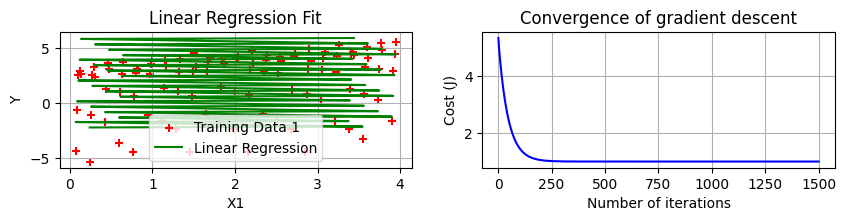

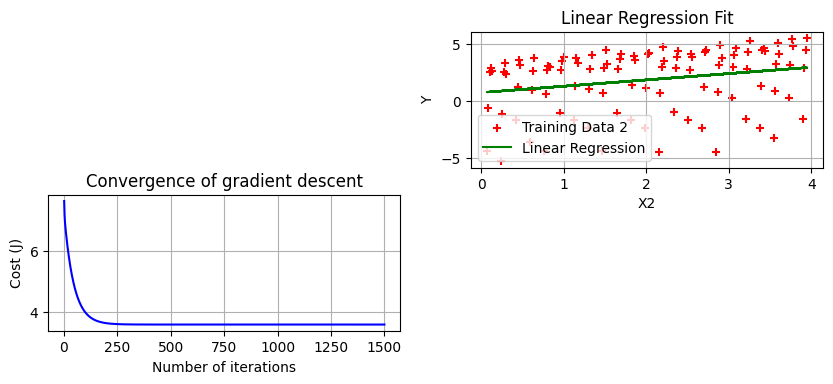

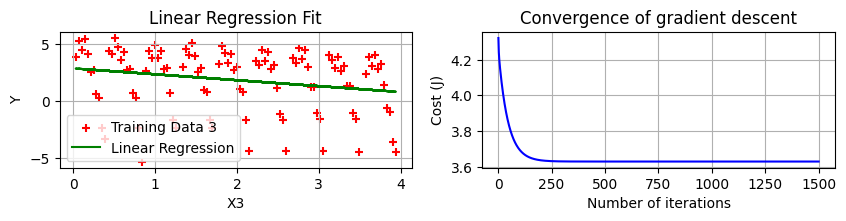

In [ ]:
#Plot the final regression model and loss over the iteration per each explanatory variable.
for k in range(0,3):
  plt.subplot(3, 2, k+1)
  if k < 1:
    xVar = xbin[0].X1
  if k > 1:
    xVar = xbin[2].X3
  else:
    xVar = xbin[1].X2
  plt.scatter(xVar, y, color='red', marker= '+', label= 'Training Data %d'%(k+1))
  plt.plot(xVar, xbin[k].dot(thetabin[k]), color='green', label='Linear Regression')

  plt.rcParams["figure.figsize"] = (10,6)
  plt.grid()
  plt.xlabel('X%d'%(k+1))
  plt.ylabel('Y')
  plt.title('Linear Regression Fit')
  plt.legend()

  plt.subplot(3, 2, k+2)
  plt.plot(range(1, iterations + 1),cost_hstry[k], color='blue')
  plt.rcParams["figure.figsize"] = (10,6)
  plt.grid()
  plt.xlabel('Number of iterations')
  plt.ylabel('Cost (J)')
  plt.title('Convergence of gradient descent')

  plt.show()





In [ ]:
#Which explanatory variable has the lower loss (cost) for explaining the output (Y)?
print('X1 has the lowest loss cost for Y.')
print('This may be seen by comparing all the 750 iterations mark of the Convergence of gradient descent')
print('graphs together and although the lowest point at 0 iterations is X3, I believe this method is a good')
print('indication of the lowest cost.')
#Based on your training observations, describe the impact of the different learning rates on the final loss and number of
#training iterations.
print('I found that changing the learning rate from .01 to .05 drastically changed the required amount of iterations to achieve a near-minimum cost')
print('I also found that .04 to .09 all returned about the same cost graphs')



X1 has the lowest loss cost for Y.
This may be seen by comparing all the 750 iterations mark of the Convergence of gradient descent
graphs together and although the lowest point at 0 iterations is X3, I believe this method is a good
indication of the lowest cost.
I found that changing the learning rate from .01 to .05 drastically changed the required amount of iterations to achieve a near-minimum cost
I also found that .04 to .09 all returned about the same cost graphs


In [ ]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 500);
theta1_vals = np.linspace(-1, 4, 100);
# initialize J vals to a matrix of 0's
J_vals = np.zeros(shape = (len(theta1_vals),len(theta0_vals)));
for i in range(len(theta0_vals)):
  for j in range(len(theta1_vals)):
    t = [theta0_vals[i], theta1_vals[j]]
    J_vals[j,i] = costFunction(x, y, t)

In [ ]:
print (J_vals)

[[ 99.15906754  98.60631261  98.0551641  ...  22.44067724  22.68631267
   22.93355453]
 [ 97.76606879  97.21728139  96.67010041 ...  23.01954141  23.26914437
   23.52035376]
 [ 96.38628465  95.84146478  95.29825133 ...  23.61162018  23.86519068
   24.1203676 ]
 ...
 [ 25.56539924  25.39749482  25.23119681 ... 140.11771196 140.7481979
  141.38029027]
 [ 25.45421738  25.29028048  25.12795001 ... 141.97839301 142.61284649
  143.24890638]
 [ 25.35625012  25.19628076  25.03791781 ... 143.85228867 144.49070968
  145.1307371 ]]


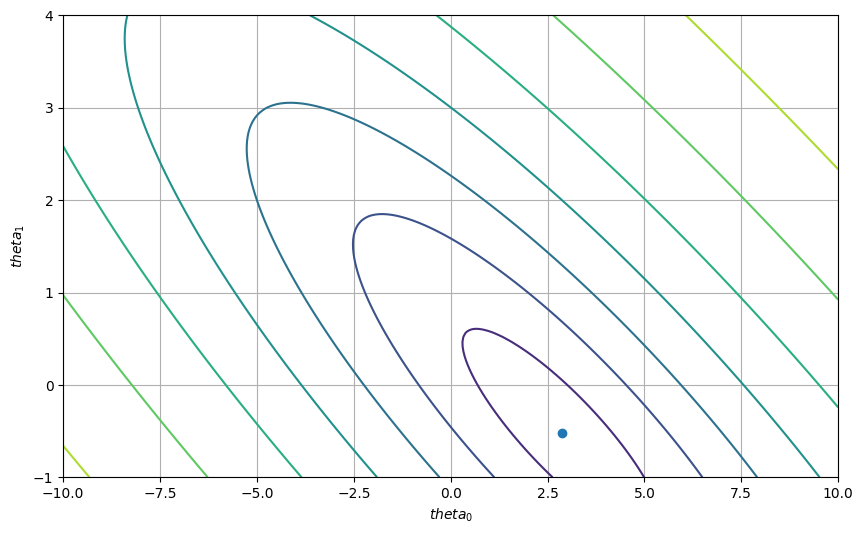

In [ ]:
## Contour Plot <- I added this because I think it's neat
import matplotlib.pyplot as plt
# Plot J_vals as contours spaced logarithmically

plt.contour(theta0_vals, theta1_vals, np.log(J_vals))
plt.xlabel('$theta_0$')
plt.ylabel('$theta_1$')
plt.scatter(theta[0],theta[1])
plt.grid()
plt.show()

In [ ]:
#Problem 2 (50 points)

#This time, run linear regression with gradient descent algorithm using all three explanatory variables.
df=pd.read_csv('D3.csv')
#display(df)

if df.X1.size == df.X2.size == df.X3.size:
  m = df.X1.size
  X_0 = np.ones((m, 1))
  X_0 = pd.DataFrame(X_0)
  if df.size == 500:
    print('<(0_0<)')
  else:
    df.insert(0, "intercept",X_0)


x = df.loc[:,['intercept','X1','X2','X3']]
xarray = x.loc[:,['intercept','X1','X2','X3']].values
y = df.Y
#yarray = y.loc[:,['Y','Y','Y','Y']].values
yarray = y.values
theta = np.zeros(4) #<---made this 4 to match the shape of 'x'
iterations = 1500;
alpha = .09;
#print(x.X1)
#print(xarray.shape)
#print(yarray.shape)

theta2, cost_history2 = gradientDescent(xarray, yarray, theta, alpha, iterations)
print('Final value of theta =', theta2)
print('cost_history =', cost_history2)


Final value of theta = [ 5.31416018 -2.00371828  0.53256449 -0.26560084]
cost_history = [4.10038644 3.5871816  3.22984001 ... 0.73846424 0.73846424 0.73846424]


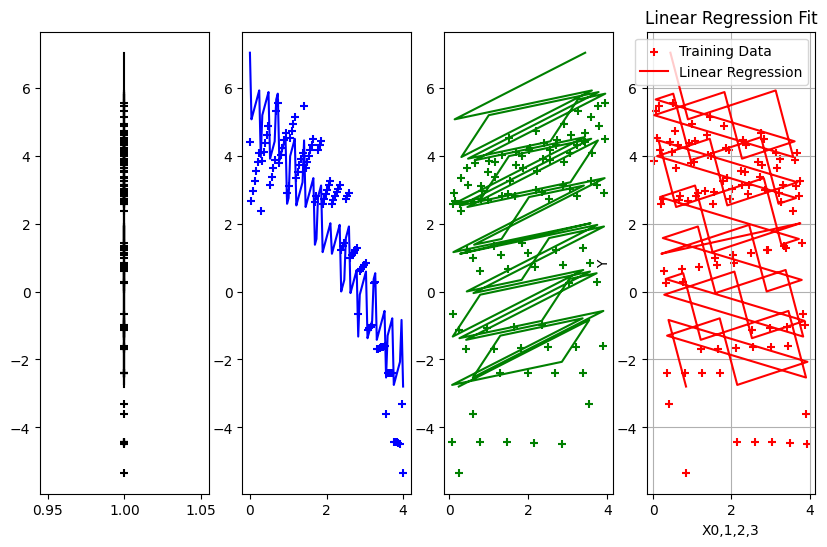

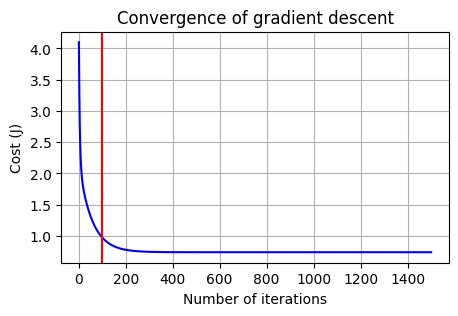

In [ ]:

#Plot the final regression model and loss over the iteration per each explanatory variable.
plt.subplot(1,4,1)
plt.scatter(x.intercept, y, color='black', marker= '+', label= 'Training Data')
plt.plot(x.intercept, x.dot(theta2), color='black', label='Linear Regression')
plt.subplot(1,4,2)
plt.scatter(x.X1, y, color='blue', marker= '+', label= 'Training Data')
plt.plot(x.X1, x.dot(theta2), color='blue', label='Linear Regression')
plt.subplot(1,4,3)
plt.scatter(x.X2, y, color='green', marker= '+', label= 'Training Data')
plt.plot(x.X2, x.dot(theta2), color='green', label='Linear Regression')
plt.subplot(1,4,4)
plt.scatter(x.X3, y, color='red', marker= '+', label= 'Training Data')
plt.plot(x.X3, x.dot(theta2), color='red', label='Linear Regression')
plt.rcParams["figure.figsize"] = (5,3)
plt.grid()
plt.xlabel('X0,1,2,3')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


plt.plot(range(1, iterations + 1),cost_history2, color='blue')
plt.axvline(x=100,color="red")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')




plt.show()

In [ ]:
#Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)
print(theta2)

x1,x2,x3 = [1, 1, 1]
y1 = theta2[0]+(theta2[1]*x1)+(theta2[2]*x2)+(theta2[3]*x3)
print(y1)

x1,x2,x3 = [2, 0, 4]
y2 = theta2[0]+(theta2[1]*x1)+(theta2[2]*x2)+(theta2[3]*x3)
print(y2)

x1,x2,x3 = [3, 2, 1]
y3 = theta2[0]+(theta2[1]*x1)+(theta2[2]*x2)+(theta2[3]*x3)
print(y3)


[ 5.31416018 -2.00371828  0.53256449 -0.26560084]
3.5774055511760006
0.2443202560570399
0.10253347991205658


In [ ]:



#Homework instructions:

# You will submit: (1) a report (pdf file) that explains your answers for each problem.
# The report MUST contain the link to your GitHub repository to access the source code you have developed for this homework.
# Your report should contain your name, student ID, and homework number.
# (2) a second pdf file which contains both source codes, results, and plots you have developed and plotted for this homework.
# The pdf file name should contain your name, student ID, and homework number.
# In your report, provide separate and clear responses for each problem. Make reasonable assumptions where necessary and
# clearly state them! Be sure to show all the work involved in deriving your answers! If you just give a final answer without
# explanation, you may not receive credit for that question.
# You may discuss concepts with your classmates. This fosters group learning and improves the class’ progress. However, make
# sure to submit your own independent and individual solutions.